In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,os




In [2]:
groups = []
datasets = []
atts = {} # attributes

def gather_names_and_atts(name, obj):
    if isinstance(obj, h5py.Group):
        groups.append(name)
    elif isinstance(obj, h5py.Dataset):
        datasets.append(name)
    for key, val in obj.attrs.items():
        atts[name + '/' + key] = val

def list_groups_datasets_atts(file):
    with h5py.File(file, 'r') as f:
        f.visititems(gather_names_and_atts)

def print_lists(list_name):
    i = 0
    for name in list_name:
        print(i, name)
        i=i+1
    print()

def create_dataframe_from_datasets(file_name, dataset_names):

    with h5py.File(file_name, 'r') as f:
        dataset_names =[]
       
        for i in f.keys():
            for j in f[i].keys():
                dataset_names.append(i+"/"+j)
       
        
        dfs = {name: pd.DataFrame(f[name][:])   for name in dataset_names }
    return dfs


def poop():
    with h5py.File(file_name, 'r') as f:
        for name in dataset_names:
            try:
                dfs = {name: pd.DataFrame(f[name][:]) }
            except:
                print("issue with", name)
    return dfs

In [3]:
file_list=glob.glob("./data/20230905*")
for file in file_list:
    f_info= os.stat(file)
    print(file,f_info.st_size)

./data\20230905_slow_control.h5 17888
./data\20230905_slow_control_1.h5 17016
./data\20230905_slow_control_10.h5 334944
./data\20230905_slow_control_11.h5 187368
./data\20230905_slow_control_12.h5 2188448
./data\20230905_slow_control_13.h5 187256
./data\20230905_slow_control_14.h5 1259968
./data\20230905_slow_control_15.h5 380776
./data\20230905_slow_control_16.h5 62936
./data\20230905_slow_control_17.h5 710280
./data\20230905_slow_control_18.h5 1452032
./data\20230905_slow_control_2.h5 56792
./data\20230905_slow_control_3.h5 17016
./data\20230905_slow_control_4.h5 17016
./data\20230905_slow_control_5.h5 17016
./data\20230905_slow_control_6.h5 17016
./data\20230905_slow_control_7.h5 17016
./data\20230905_slow_control_8.h5 559376
./data\20230905_slow_control_9.h5 1022680


In [4]:

if 1:
    file_name= "./data/20230905_slow_control.h5"

    with h5py.File(file_name, 'r') as f:
        dataset_names =[]
        for i in f.keys():
            for j in f[i].keys():
                dataset_names.append(i+"/"+j)
       
        
        dfs = {name: pd.DataFrame(f[name][:])   for name in dataset_names }
dfs         

{'omb_daq/Flow_Meter': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Inter':         0
 0   0.000
 1   0.000
 2   0.000
 3   0.000
 4  -0.700
 5 -19.383
 6   0.000
 7   0.000
 8   0.000
 9   0.000,
 'omb_daq/Liquid_Nitro_Valve': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/PID_Heater': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Pressure_1': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Pressure_2': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Slope':          0
 0    1.000
 1    1.000
 2    1.000
 3    1.000
 4    9.350
 5  204.062
 6    1.000
 7    1.000
 8    1.000
 9    1.000,
 'pid_info/Heater_State': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Nitro_Baseline': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Nitro_Weigth': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Target_Channel': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Target_Temperature': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Time': Empty Data

In [5]:
dfs

{'omb_daq/Flow_Meter': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Inter':         0
 0   0.000
 1   0.000
 2   0.000
 3   0.000
 4  -0.700
 5 -19.383
 6   0.000
 7   0.000
 8   0.000
 9   0.000,
 'omb_daq/Liquid_Nitro_Valve': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/PID_Heater': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Pressure_1': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Pressure_2': Empty DataFrame
 Columns: [0]
 Index: [],
 'omb_daq/Slope':          0
 0    1.000
 1    1.000
 2    1.000
 3    1.000
 4    9.350
 5  204.062
 6    1.000
 7    1.000
 8    1.000
 9    1.000,
 'pid_info/Heater_State': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Nitro_Baseline': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Nitro_Weigth': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Target_Channel': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Target_Temperature': Empty DataFrame
 Columns: [0]
 Index: [],
 'pid_info/Time': Empty Data

In [6]:
channel_list=  ["Flow_Meter" ,"Liquid_Nitro_Valve", "PID_Heater","Pressure_1","Pressure_2",
                "Heater_State","Nitro_Baseline","Nitro_Weigth","Target_Channel","Target_Temperature",
                "Time","Valve_State","Cold_Finger","Nitro_Reservoir","Xe_Cell_1","Xe_Cell_2",
                "Xe_Cell_3","Xe_Cell_Outside","Pressure_Cell","Pressure_Mfold","Storage_1","Storage_2"]



def getprologue_time(f):
    ''' Argument f == hdf5 file
        returns dict of time information 
    '''
    atr="Prologue"
    prologue=f.attrs[atr]
    prologue=prologue.replace("\r","")
    splitlog=prologue.split( "\n")
    timeinfostr=splitlog[2]
    timeinfo={}
    timeinfo["year"]=int(timeinfostr[0:4])
    timeinfo["mon"]=int(timeinfostr[4:6])
    timeinfo["day"]=int(timeinfostr[6:8])
    timeinfo["hour"]=int(timeinfostr[8:10])
    timeinfo["min"]=int(timeinfostr[10:12])
    timeinfo["sec"]=int(timeinfostr[12:14])
    return timeinfo

def timetosecs(timeinfo):
    '''argument timeinfo dict 
    returns total seconds '''
    return timeinfo["hour"]*60*60 +timeinfo["min"]*60+timeinfo["sec"]



def calib_dict_wtime(file_name):

    fh5= h5py.File(file_name, 'r') 
    timeinfo=getprologue_time(fh5)
    timeoffset=timetosecs(timeinfo)
    print("Time offset",timeoffset)
    fh5.close()
    list_groups_datasets_atts(file_name)
    dataset_names = datasets # to create a dataframe for each
    datadict = create_dataframe_from_datasets(file_name, dataset_names)
    newdict={}
    l,m,n=-1,-1,-1
    j=0
    js=[-1,-1,-1]
    print(datadict.keys())
    for key in datadict.keys():

        #print(key)
        pos=key.find("/")
        group=key[:pos]
        if group=="omb_daq":
            j=0
            l+=1
            js[0]+=1
        elif group=="pid_info":
            j=1
            m+=1
            js[1]+=1
        elif group=="tc08_daq":
            j=2
            n+=1
            js[2]+=1
        
        m,b=1,0
        s_key=key[pos+1:]

        if s_key =="Pressure_1":
            s_key="Pressure_Cell"
        elif s_key =="Pressure_2":
            s_key="Pressure_Mfold"
        if s_key not in channel_list:
            
           print("Not in channel list " ,s_key)
           # continue

        if s_key=="Inter" or s_key =="Slope":
                continue
        
        else:
            
            #print(group,key, js[j])
            if j==1:
                m,b=1,0
            else:
                try:
                    m = datadict["%s/Slope"%(group)][0][js[j]]
                    b = datadict["%s/Inter"%(group)][0][js[j]]
                except:
                    m,b=1,0
        
            
        #print(m,b, )
        
        newdict[s_key]=datadict[key][0]*m +b
    
    try:
        newdict["Time"] = timeoffset + np.arange(0,len(newdict["Time"]))*2
    except:
        newdict["Time"] = timeoffset + np.arange(0,len(newdict[s_key]))*2

    return newdict



def get_slow_ctr_df(filedate):

    filedes ="slow_control"
    datadir="./data"
    
    try:
        filedate=str(filedate)
    except:
        print("Issue with file date")

    filelist=glob.glob("%s/%s*.h5"%(datadir,filedate))
    print(filelist)
    if len(filelist) <1:
        print("Error with globing files")

    datadicts=[]
    DFs=[]
    for filename in filelist:
      
        finfo=os.stat(filename)
        print(finfo.st_size)
        if finfo.st_size < 18000:
            print("Skipping %s due to size"%(filename))
            continue
        datasets = []
        print(filename)
        datadict=calib_dict_wtime(filename)
        datadicts.append(datadict)
        DFs.append(pd.DataFrame.from_dict(datadict))
        print( "len",len(datadict["Time"]))

    DF = pd.concat(DFs)
    DF =DF.sort_values(by=["Time"])

    return DF

In [7]:
DF=get_slow_ctr_df("20231208")
DF

['./data\\20231208_slow_control.h5']
4254976
./data\20231208_slow_control.h5
Time offset 45396
dict_keys(['omb_daq/Flow_Meter', 'omb_daq/Inter', 'omb_daq/Liquid_Nitro_Valve', 'omb_daq/PID_Heater', 'omb_daq/Pressure_Cell', 'omb_daq/Pressure_Mfold', 'omb_daq/Pressure_Nitro', 'omb_daq/Slope', 'pid_info/Heater_State', 'pid_info/Nitro_Baseline', 'pid_info/Nitro_Weigth', 'pid_info/Target_Channel', 'pid_info/Target_Temperature', 'pid_info/Time', 'pid_info/Valve_State', 'tc08_daq/Cold_Finger', 'tc08_daq/Inter', 'tc08_daq/Nitro_Reservoir', 'tc08_daq/Slope', 'tc08_daq/Storage_1', 'tc08_daq/Storage_2', 'tc08_daq/Xe_Cell_1', 'tc08_daq/Xe_Cell_2', 'tc08_daq/Xe_Cell_3', 'tc08_daq/Xe_Cell_Outside'])
Not in channel list  Inter
Not in channel list  Pressure_Nitro
Not in channel list  Slope
Not in channel list  Inter
Not in channel list  Slope
len 4295


,Flow_Meter,Liquid_Nitro_Valve,PID_Heater,Pressure_Cell,Pressure_Mfold,Pressure_Nitro,Heater_State,Nitro_Baseline,Nitro_Weigth,Target_Channel,...,Time,Valve_State,Cold_Finger,Nitro_Reservoir,Storage_1,Storage_2,Xe_Cell_1,Xe_Cell_2,Xe_Cell_3,Xe_Cell_Outside
0,0.002928,0.0,0.0,-0.584518,-13.406859,0.106568,0.0,120.0,0.0,1.0,...,45396,0.0,295.355933,295.168020,295.908959,290.427462,295.182190,295.167480,295.376709,294.730743
1,0.002688,0.0,0.0,-0.586011,-13.410557,0.106736,0.0,120.0,0.0,1.0,...,45398,0.0,295.348509,295.240780,295.908807,290.289844,295.189392,295.163696,295.383911,294.741608
2,0.003003,0.0,0.0,-0.586047,-13.414352,0.106578,0.0,120.0,0.0,1.0,...,45400,0.0,295.348509,295.084078,295.916110,290.174463,295.189392,295.171021,295.383911,294.730591
3,0.003108,0.0,0.0,-0.585307,-13.418244,0.106137,0.0,120.0,0.0,1.0,...,45402,0.0,295.344387,295.036198,295.908352,289.989926,295.185242,295.166870,295.376099,294.722778
4,0.003339,0.0,0.0,-0.586020,-13.421844,0.106301,0.0,120.0,0.0,1.0,...,45404,0.0,295.344266,295.072532,295.908231,289.889167,295.185120,295.166748,295.383301,294.726318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,0.002903,0.0,0.0,-0.585182,-13.881120,0.099004,0.0,120.0,0.0,7.0,...,53976,0.0,295.381631,295.332207,294.345638,208.406741,294.980499,294.951141,295.226410,294.778625
4291,0.002773,0.0,0.0,-0.585213,-13.901846,0.098737,0.0,120.0,0.0,7.0,...,53978,0.0,295.377994,295.346783,294.335941,208.546957,294.980499,294.947479,295.219055,294.763947
4292,0.002666,0.0,0.0,-0.585677,-13.897468,0.098796,0.0,120.0,0.0,7.0,...,53980,0.0,295.374206,295.353935,294.343062,208.681145,294.980347,294.947327,295.222595,294.767487
4293,0.002922,0.0,0.0,-0.585227,-13.905155,0.099109,0.0,120.0,0.0,7.0,...,53982,0.0,295.381358,295.503212,294.342911,208.733549,294.987549,294.954529,295.222443,294.774689


In [30]:
get_slow_ctr_df(20231109)

./data\20231109_slow_control_11.h5
82966


KeyError: 'Time'

In [3]:
groups = []
datasets = []
atts = {} # attributes
file_name = 'data/20230905_slow_control_1.h5'

list_groups_datasets_atts(file_name)

print("Groups:")
print_lists(groups)

print("Datasets:")
print_lists(datasets)

print("Attributes:")
for key, val in atts.items():
    print(key, val)

Groups:
0 omb_daq
1 pid_info
2 tc08_daq

Datasets:
0 omb_daq/Flow_Meter
1 omb_daq/Inter
2 omb_daq/Liquid_Nitro_Valve
3 omb_daq/PID_Heater
4 omb_daq/Pressure_1
5 omb_daq/Pressure_2
6 omb_daq/Slope
7 pid_info/Heater_State
8 pid_info/Nitro_Baseline
9 pid_info/Nitro_Weigth
10 pid_info/Target_Channel
11 pid_info/Target_Temperature
12 pid_info/Time
13 pid_info/Valve_State
14 tc08_daq/Cold_Finger
15 tc08_daq/Inter
16 tc08_daq/Nitro_Reservoir
17 tc08_daq/Slope
18 tc08_daq/Xe_Cell_1
19 tc08_daq/Xe_Cell_2
20 tc08_daq/Xe_Cell_3
21 tc08_daq/Xe_Cell_Outside

Attributes:


In [8]:
channel_list=  ["Flow_Meter" ,"Liquid_Nitro_Valve", "PID_Heater","Pressure_1","Pressure_2",
                "Heater_State","Nitro_Baseline","Nitro_Weigth","Target_Channel","Target_Temperature",
                "Time","Valve_State","Cold_Finger","Nitro_Reservoir","Xe_Cell_1","Xe_Cell_2",
                "Xe_Cell_3","Xe_Cell_Outside"]



def getprologue_time(f):
    ''' Argument f == hdf5 file
        returns dict of time information 
    '''
    atr="Prologue"
    prologue=f.attrs[atr]
    prologue=prologue.replace("\r","")
    splitlog=prologue.split( "\n")
    timeinfostr=splitlog[2]
    timeinfo={}
    timeinfo["year"]=int(timeinfostr[0:4])
    timeinfo["mon"]=int(timeinfostr[4:6])
    timeinfo["day"]=int(timeinfostr[6:8])
    timeinfo["hour"]=int(timeinfostr[8:10])
    timeinfo["min"]=int(timeinfostr[10:12])
    timeinfo["sec"]=int(timeinfostr[12:14])
    return timeinfo

def timetosecs(timeinfo):
    '''argument timeinfo dict 
    returns total seconds '''
    return timeinfo["hour"]*60*60 +timeinfo["min"]*60+timeinfo["sec"]



def calib_dict_wtime(file_name):

    fh5= h5py.File(file_name, 'r') 
    timeinfo=getprologue_time(fh5)
    timeoffset=timetosecs(timeinfo)
    print(timeoffset)
    fh5.close()
    list_groups_datasets_atts(file_name)
    dataset_names = datasets # to create a dataframe for each
    datadict = create_dataframe_from_datasets(file_name, dataset_names)
    newdict={}
    l,m,n=-1,-1,-1
    j=0
    js=[-1,-1,-1]
    for key in datadict.keys():

        #print(key)
        pos=key.find("/")
        group=key[:pos]
        if group=="omb_daq":
            j=0
            l+=1
            js[0]+=1
        elif group=="pid_info":
            j=1
            m+=1
            js[1]+=1
        elif group=="tc08_daq":
            j=2
            n+=1
            js[2]+=1
        
        m,b=1,0
        s_key=key[pos+1:]
        if s_key not in channel_list:
            #print("skiping " ,s_key)
            continue

        if s_key=="Inter" or s_key =="Slope":
                continue
        
        else:
            
            #print(group,key, js[j])
            if j==1:
                m,b=1,0
            else:
                try:
                    m = datadict["%s/Slope"%(group)][0][js[j]]
                    b = datadict["%s/Inter"%(group)][0][js[j]]
                except:
                    m,b=1,0
        
            
        #print(m,b, )
        
        newdict[s_key]=datadict[key][0]*m +b

    newdict["Time"] = timeoffset + np.arange(0,len(newdict["Time"]))*2


    return newdict




In [15]:


dataset_names = datasets # to create a dataframe for each
df = create_dataframe_from_datasets(file_name, dataset_names)
# sample_interval = (time_base - 2) / 62500000
#y = []
#with h5py.File(file_name, 'r') as f:
#    for i in range(0,len(datasets)):
#        y.append(np.array(f[datasets[i]][:]))


In [9]:
filedate="20231110"
filedes ="slow_control"
datadir ="./data"

filelist=glob.glob("%s/%s*.h5"%(datadir,filedate))

print(filelist)

datadicts=[]
DFs=[]
for filename in filelist:
    datasets = []
    print(filename)
    datadict=calib_dict_wtime(filename)
    datadicts.append(datadict)
    DFs.append(pd.DataFrame.from_dict(datadict))
    print( "len",len(datadict["Time"]))







['./data\\20231110_slow_control_9.h5']
./data\20231110_slow_control_9.h5
32059
len 1230


dict_keys(['Flow_Meter', 'Liquid_Nitro_Valve', 'PID_Heater', 'Heater_State', 'Nitro_Baseline', 'Nitro_Weigth', 'Target_Channel', 'Target_Temperature', 'Time', 'Valve_State', 'Cold_Finger', 'Nitro_Reservoir', 'Xe_Cell_1', 'Xe_Cell_2', 'Xe_Cell_3', 'Xe_Cell_Outside'])

In [149]:
DF = pd.concat(DFs)
DF =DF.sort_values(by=["Time"])
DF

,Flow_Meter,Liquid_Nitro_Valve,PID_Heater,Heater_State,Nitro_Baseline,Nitro_Weigth,Target_Channel,Target_Temperature,Time,Valve_State,Cold_Finger,Nitro_Reservoir,Xe_Cell_1,Xe_Cell_2,Xe_Cell_3,Xe_Cell_Outside
0,0.002735,0.0,0.0,0.0,120.0,80.0,1.0,300.0,32059,0.0,265.759787,261.513842,263.580170,266.346405,265.467133,265.190887
1,0.002675,0.0,0.0,0.0,120.0,-143.0,1.0,300.0,32061,0.0,265.763969,261.494386,263.584381,266.338959,265.471344,265.198975
2,0.002244,0.0,0.0,0.0,120.0,80.0,1.0,300.0,32063,0.0,265.756393,261.494568,263.580627,266.346893,265.467590,265.191376
3,0.002435,0.0,0.0,0.0,120.0,80.0,1.0,300.0,32065,0.0,265.756393,261.498508,263.580627,266.335205,265.463715,265.187469
4,0.002319,0.0,0.0,0.0,120.0,80.0,1.0,300.0,32067,0.0,265.752818,261.494841,263.573151,266.335510,265.463989,265.191650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.002432,0.0,0.0,0.0,120.0,76.0,2.0,165.0,34509,0.0,211.086907,166.628204,256.164948,259.579468,262.858521,226.137589
1226,0.002409,0.0,0.0,0.0,120.0,76.0,2.0,165.0,34511,1.0,211.068588,166.702721,256.149017,259.567535,262.850555,226.115921
1227,0.002767,0.0,0.0,0.0,120.0,76.0,2.0,165.0,34513,1.0,211.059421,166.803845,256.149017,259.563538,262.850555,226.102936
1228,0.002226,0.0,0.0,0.0,120.0,76.0,2.0,165.0,34515,1.0,211.032102,166.883893,256.125275,259.535797,262.830780,226.064102


(161.0, 395.0)

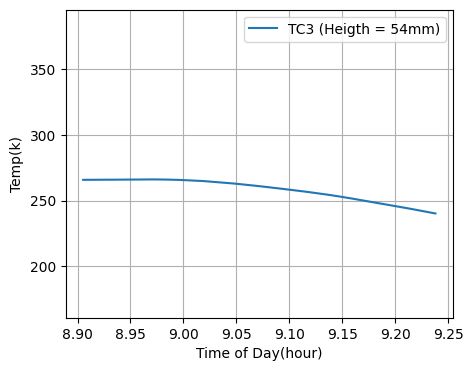

In [140]:


fig, plots = plt.subplots(1, 1, figsize=(5,4))

plt.errorbar(x=DF["Time"]/3600.0,y=DF["Cold_Finger"],label="TC3 (Heigth = 54mm)")
#plt.errorbar(x=DF["Time"]/3600.0,y=DF["Xe_Cell_2"],label="TC2 (Heigth = 31mm)")
#plt.errorbar(x=DF["Time"]/3600.0,y=DF["Xe_Cell_1"],label="TC1 (Heigth <  2mm)")

plt.ylabel("Temp(k)")
plt.xlabel("Time of Day(hour)")
plt.legend()
plt.grid(True)

plt.ylim(161,395)
#plt.xlim(10.89,15)

In [ ]:
f1=datadicts[1]


newdict={}
for key in f1.keys():

    pos=key.find("/")
    s_key=key[pos+1:]
    if s_key=="Inter" or s_key =="Slope":
        continue
    else:
        newdict[s_key]=np.array(f1[key][0])






In [8]:
DF=pd.DataFrame.from_dict(newdict)
DF

NameError: name 'newdict' is not defined

In [ ]:

np.array(df["omb_daq/Flow_Meter"][0])


In [ ]:
MassFlow_CF=1.32
binsize=2/60
XeDensity = 7 # kg/m^3 (290-295k AND 120-160 KpA)
cumsum_list=[]
cumsum=0
for fr in np.array(df["omb_daq/Flow_Meter"][0]):
    if  fr >= 0.9:
        cumsum=cumsum+ (fr*binsize*MassFlow_CF) * XeDensity
    if fr > 4.98:
        print(fr)    

    cumsum_list.append(cumsum)
    #print(cumsum)

#MassFlow_P = 35
print(cumsum)
df["XeMass"]=cumsum_list


In [ ]:
(cumsum),(0.24*7.54*1000),(0.24*7.54*1000)/(cumsum)


In [ ]:
np.sqrt(290/270)

./data\20231109_slow_control_11.h5
82966
len 540
./data\20231109_slow_control_12.h5
84098
len 16590
./data\20231109_slow_control_9.h5
54189
len 7410


KeyError: 'pid_info/Time'

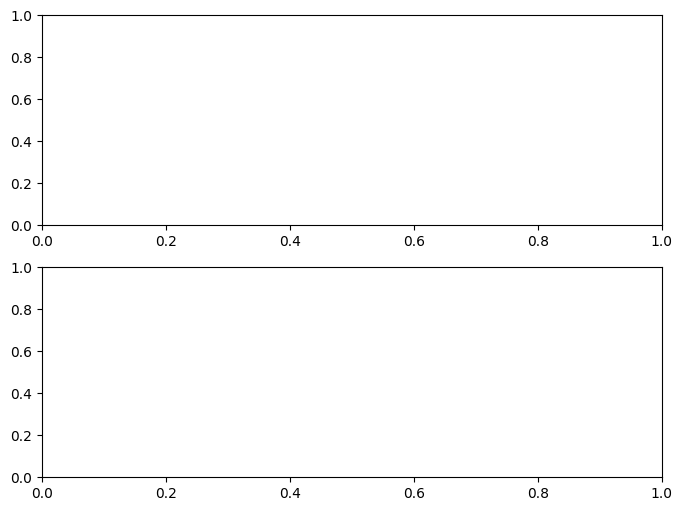

In [9]:
fig, plots = plt.subplots(2, 1, figsize=(8,6))
df=get_slow_ctr_df("20231109")

for i in plotted_channels[1]:
    plots[1].errorbar(x,df[datasets[i]], label=datasets[i])

plots[0].errorbar(x, df[datasets[4]]*m[4] + b[4], label=datasets[4], fmt='b-')
x=DF["Time"]

plots0_2= plots[0].twinx()
plots0_2.errorbar(x,df[],fmt="-",color="red",label="Flow Rate")
plots0_2.set_ylabel("Flow Rate", color="red", fontsize=14)
plots0_2.tick_params(axis="y", labelcolor="red")

plots0_2.legend(loc="upper right")
#plt.errorbar(x, df['tc08_daq/Xe_Cell_2_'], label='TC 2', fmt='c-')
#plt.errorbar(x, df['tc08_daq/Xe_Cell_3'], label='TC 3', fmt='m-')
#plt.errorbar(x, df['tc08_daq/Xe_Cell_Outside'], label='Xe Cell', fmt='k-')

x_min, x_max = 1695, 6501
plt.xlim(x_min, x_max)

for plot in plots:
    plot.set_xlim(x_min, x_max)
    plot.legend()
    plot.grid(1)
plots[0].legend(loc="upper left")



y_min, y_max = 160, 245
#plt.ylim(y_min, y_max)

plots[0].set_ylim(0, 24)
plots[0].set_ylabel('psig')

plots[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

In [ ]:
+fig, [plt1,plt2] = plt.subplots(2, 1, figsize=(9,5))

x = np.arange(0, len(df[datasets[22]]))*2.0/60.0 # placeholder for time steps

p1m, p1b = 9.35, -0.7
p2m, p2b = 131, -3.7


plt1.errorbar(x,df[datasets[15]], label=datasets[15], fmt='r-')
plt1.errorbar(x, df[datasets[17]], label=datasets[17], fmt='b-')
plt1.errorbar(x, df[datasets[22]], label=datasets[22], fmt='k-')
#plt.errorbar(x, p2m*df[datasets[4]]+p2b, label='Pressure 2', fmt='m-')
#plt.errorbar(x, df['tc08_daq/Xe_Cell_Outside'], label='xe_cell', fmt='k-')

x_min, x_max = 0, 218
y_min, y_max = 80,301
plt1.set_xlim(x_min, x_max)
plt1.set_ylim(y_min, y_max)

plt1.grid(1)

plt1.legend()
#plt.set_tight_layout()
plt1.set_xlabel("Time(mins)")
plt1.set_ylabel("Temp(K)")




plt2.errorbar(x,df[datasets[19]], label=datasets[19], fmt='-',c="dimgray")
plt2.errorbar(x, df[datasets[20]], label=datasets[20], fmt='-',c="lightcoral")
plt2.errorbar(x, df[datasets[21]], label=datasets[21], fmt='-',c="purple")
#plt.errorbar(x, p2m*df[datasets[4]]+p2b, label='Pressure 2', fmt='m-')
#plt.errorbar(x, df['tc08_daq/Xe_Cell_Outside'], label='xe_cell', fmt='k-')

x_min, x_max = 0, 218
y_min, y_max = 150,301
plt2.set_xlim(x_min, x_max)
plt2.set_ylim(y_min, y_max)

plt2.grid(1)

plt2.legend()
plt.tight_layout()
plt2.set_xlabel("Time(mins)")
plt2.set_ylabel("Temp(K)")


In [ ]:
fig, plots = plt.subplots(1, 1, figsize=(8,4))

x = np.arange(0, len(df[datasets[22]]))*2.0/60.0 # placeholder for time steps

p1m, p1b = 9.35, -0.7
p2m, p2b = 131, -3.7


plt.errorbar(x, df[datasets[19]], label=datasets[19], fmt='-',c="dimgray")
plt.errorbar(x, df[datasets[20]], label=datasets[20], fmt='-',c="lightcoral")
plt.errorbar(x, df[datasets[21]], label=datasets[21], fmt='-',c="purple")
#plt.errorbar(x, p2m*df[datasets[4]]+p2b, label='Pressure 2', fmt='m-')
#plt.errorbar(x, df['tc08_daq/Xe_Cell_Outside'], label='xe_cell', fmt='k-')




x_min, x_max = 47, 218
y_min, y_max = 150,301
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid(1)

plt.legend()
plt.tight_layout()
plt.xlabel("Time(mins)")
plt.ylabel("Temp(K)")
m = np.array(df[datasets[6]])
b = np.array(df[datasets[1]])

y1=np.array(df[datasets[4]][0]*m[4][0]+ b[4][0])
#y1=np.array(df["XeMass"])

c1="lightsteelblue"
plots0_2= plots.twinx()
#plots0_2.errorbar(x,df[datasets[0]],color="grey",fmt=".",ms="1",label="Flow Rate")
#plots0_2.set_ylabel("Mass(kg)", color=c1, fontsize=14)
plots0_2.set_ylabel("Pressure(psig)", color=c1, fontsize=14)
plots0_2.tick_params(axis="y", labelcolor=c1)
plots0_2.grid()
#plots0_2.set_ylim(-0.133,1.765)
plots0_2.set_ylim(-0.133,35)




plots0_2.fill_between(x,y1,where= (y1>0),
                  color=c1,alpha=0.4 ,label="Xenon Mass")

#plots0_2.fill_between(x,y1/1000,where= (y1/1000>0.5) & (y1/1000 <0.55), color="blue",alpha=0.6, label="Mass for 20 cm")
#plots0_2.fill_between(x,y1/1000,where= (y1/1000>1.2) & (y1/1000 <1.25), color="cyan",alpha=0.6, label="Mass for 45 cm")


plots0_2.legend(loc="right")


#plots.set_xlim(112.6,113)
#plots.set_ylim(176,201)

In [ ]:
y=np.array(df[datasets[0]][0])
y.size

In [ ]:
df[datasets[20]][int(112.7*60/2):int(112.9*60/2)]

In [ ]:



1.88*m[4][0]+ b[4][0]

In [ ]:
np.array(df[datasets[4]][0]*m[4][0]+ b[4][0])

In [32]:
DF["Nitro_Weigth"].diff()

0         NaN
1      -198.8
2       198.8
3         0.0
4         0.0
        ...  
2545      0.0
2546      0.0
2547      0.0
2548      0.0
2549      0.0
Name: Nitro_Weigth, Length: 2550, dtype: float64

./data\20231109_slow_control_11.h5
82966
len 540
./data\20231109_slow_control_12.h5
84098
len 16590
./data\20231109_slow_control_9.h5
54189
len 7410


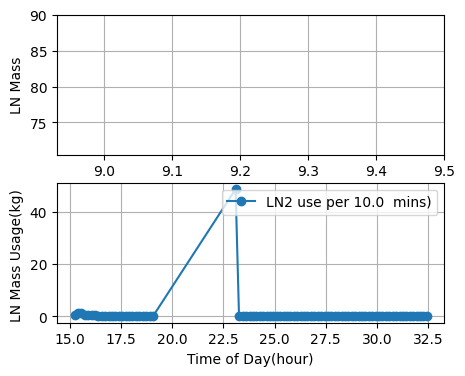

In [179]:

DF=get_slow_ctr_df("20231109")


fig, plots = plt.subplots(2, 1, figsize=(5,4))

plots[0].errorbar(x=DF["Time"]/3600.0,y=DF["Nitro_Weigth"])




plots[0].set_ylabel("LN Mass")
plots[0].set_xlabel("Time of Day(hour)")
#.legend()
plots[0].grid(True)

plots[0].set_xlim(8.93,9.5)
plots[0].set_ylim(70.5,90)


ts=300 #timestep

plots[1].errorbar(x=DF["Time"][::ts]/3600.0,y=-DF["Nitro_Weigth"].diff(periods=ts)[::ts],fmt="-o",label="LN2 use per %0.1f  mins)"%(ts*2/60))
plots[1].set_ylabel("LN Mass Usage(kg) ")
plots[1].set_xlabel("Time of Day(hour)")
plots[1].legend()
plots[1].grid(True)

#plots[1].set_ylim(-.15,2.1901)
#plots[1].set_xlim(8.93,9.75)



<ErrorbarContainer object of 3 artists>

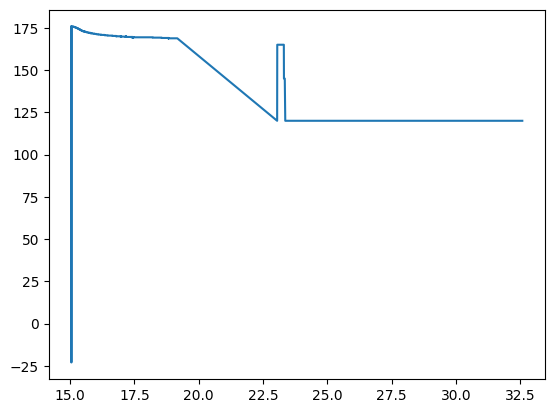

In [178]:
plt.errorbar(x=DF["Time"]/3600,y=DF["Nitro_Baseline"]+DF["Nitro_Weigth"])

(8.93, 9.75)

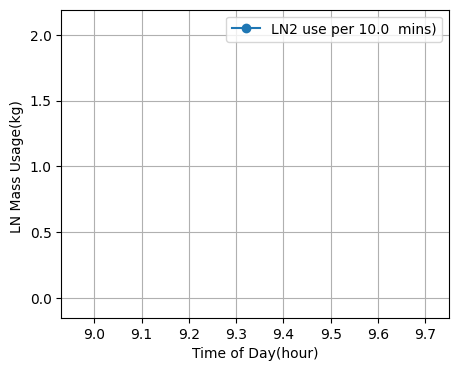

In [180]:
fig, plots = plt.subplots(1, 1, figsize=(5,4))

ts=300 #timestep

plt.errorbar(x=DF["Time"][::ts]/3600.0,y=-DF["Nitro_Weigth"].diff(periods=ts)[::ts],fmt="-o",label="LN2 use per %0.1f  mins)"%(ts*2/60))





plt.ylabel("LN Mass Usage(kg) ")
plt.xlabel("Time of Day(hour)")
plt.legend()
plt.grid(True)

plt.ylim(-.15,2.1901)
plt.xlim(8.93,9.75)

In [116]:
DF[["Time","Nitro_Weigth"]][2::5],DF[["Time","Nitro_Weigth"]][2:].diff(periods=10)

(       Time  Nitro_Weigth
 2     54193          55.8
 7     54203          55.8
 12    54213          55.8
 17    54223          55.8
 22    54233          55.8
 ...     ...           ...
 3337  60863          50.0
 3342  60873          50.0
 3347  60883          50.0
 3352  60893          50.0
 3357  60903          50.0
 
 [672 rows x 2 columns],
       Time  Nitro_Weigth
 2      NaN           NaN
 3      NaN           NaN
 4      NaN           NaN
 5      NaN           NaN
 6      NaN           NaN
 ...    ...           ...
 3355  20.0           0.0
 3356  20.0           0.0
 3357  20.0           0.0
 3358  20.0           0.0
 3359  20.0           0.0
 
 [3358 rows x 2 columns])

In [16]:
DF=get_slow_ctr_df("20231030")


['./data\\20231030_slow_control_18.h5', './data\\20231030_slow_control_2.h5', './data\\20231030_slow_control_22.h5']
3605816
./data\20231030_slow_control_18.h5
51211
len 4024
1522136
./data\20231030_slow_control_2.h5
39029
len 1694
2769248
./data\20231030_slow_control_22.h5
62054
len 2855


In [17]:
DF.keys()

Index(['Flow_Meter', 'Liquid_Nitro_Valve', 'PID_Heater', 'Heater_State',
       'Nitro_Baseline', 'Nitro_Weigth', 'Target_Channel',
       'Target_Temperature', 'Time', 'Valve_State', 'Cold_Finger',
       'Nitro_Reservoir', 'Xe_Cell_1', 'Xe_Cell_2', 'Xe_Cell_3',
       'Xe_Cell_Outside'],
      dtype='object')

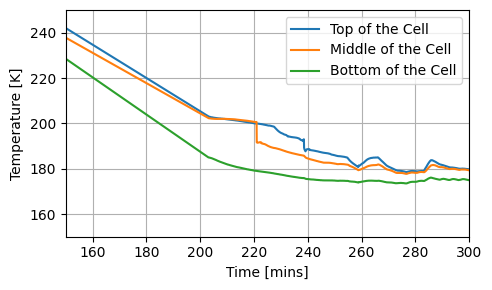

In [24]:

fig, plots = plt.subplots(1, 1, figsize=(5,3))

time=(DF["Time"] - DF["Time"].iloc[0])/60

plots.errorbar(x=time,y=DF["Xe_Cell_3"], label="Top of the Cell")
plots.errorbar(x=time,y=DF["Xe_Cell_2"], label="Middle of the Cell")
plots.errorbar(x=time,y=DF["Xe_Cell_1"], label="Bottom of the Cell")


#plots[1].errorbar(x=time, y= DF["Xe_Cell_Outside"], label="Xe Cell")
#plots[1].errorbar(x=time, y= DF["Cold_Finger"], label="Cold Finger")
#plots[1].errorbar(x=time, y= DF["Nitro_Reservoir"], label="Nitro Reservoir")



plots.grid()
plots.legend()
plots.set_xlabel("Time [mins]")
plots.set_ylabel("Temperature [K]")
plots.legend()
plt.tight_layout()

plots.set_ylim(150,250)
plots.set_xlim(150,300) 


if 1==2:
    plots[1].grid()
    plots[1].legend()
    plots[1].set_xlabel("Time [mins]")
    plots[1].set_ylabel("Temp(K)")
    plots[1].legend()
    plt.tight_layout()

    #plots[1].set_ylim(150,250)
    #plots[1].set_xlim(150,300) 



In [29]:
DF08=get_slow_ctr_df("20231208")
DF11=get_slow_ctr_df("20231211")
DF12=get_slow_ctr_df("20231212")
DF13=get_slow_ctr_df("20231213")


DFs=[DF08,DF11,DF12,DF13]

['./data\\20231208_slow_control.h5']
4254976
./data\20231208_slow_control.h5
Time offset 45396
dict_keys(['omb_daq/Flow_Meter', 'omb_daq/Inter', 'omb_daq/Liquid_Nitro_Valve', 'omb_daq/PID_Heater', 'omb_daq/Pressure_Cell', 'omb_daq/Pressure_Mfold', 'omb_daq/Pressure_Nitro', 'omb_daq/Slope', 'pid_info/Heater_State', 'pid_info/Nitro_Baseline', 'pid_info/Nitro_Weigth', 'pid_info/Target_Channel', 'pid_info/Target_Temperature', 'pid_info/Time', 'pid_info/Valve_State', 'tc08_daq/Cold_Finger', 'tc08_daq/Inter', 'tc08_daq/Nitro_Reservoir', 'tc08_daq/Slope', 'tc08_daq/Storage_1', 'tc08_daq/Storage_2', 'tc08_daq/Xe_Cell_1', 'tc08_daq/Xe_Cell_2', 'tc08_daq/Xe_Cell_3', 'tc08_daq/Xe_Cell_Outside'])
Not in channel list  Inter
Not in channel list  Pressure_Nitro
Not in channel list  Slope
Not in channel list  Inter
Not in channel list  Slope
len 4295
['./data\\20231211_slow_control.h5']
3355088
./data\20231211_slow_control.h5
Time offset 38643
dict_keys(['omb_daq/Flow_Meter', 'omb_daq/Inter', 'omb_daq

46.06666666666667 [194042.85987854004, 194042.85987854004, 194042.85987854004]
25.466666666666665 [191922.65328884125, 191923.91385555267, 191923.91385555267]
45.63333333333333 [202226.21695518494, 202226.21695518494, 202226.21695518494]
56.93333333333333 [188202.18122005463, 188205.21097183228, 188205.67930698395]


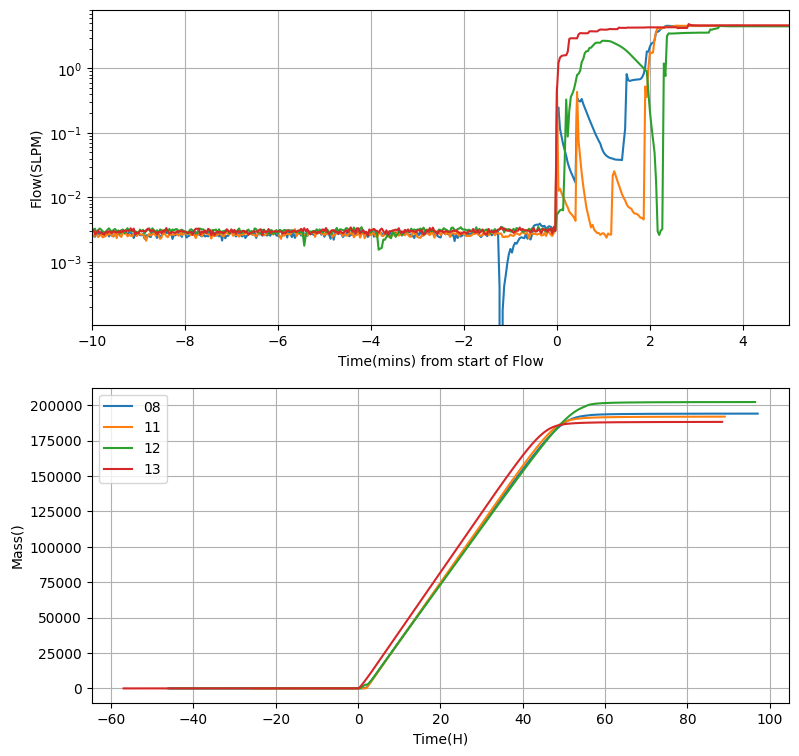

In [86]:


fig, plots = plt.subplots(2, 1, figsize=(9,9))


dates=["08","11","12","13"]
direction=["ping","pong","ping","pong"]
cell_status=["","","injecting 15.5psia","less 15.5psia"]

for j,DF in enumerate(DFs):

    time=(DF["Time"] - DF["Time"].iloc[0])/60

    flow_acum=[]
    acum=0
    start_time=0

    for i in np.arange(0,len(time),1):
        if DF["Flow_Meter"].iloc[i] > 0.005:
            if start_time == 0:
                start_time=time[i]
                #aaa="aaa"

            acum=DF["Flow_Meter"].iloc[i]/(2/60.0)+acum
        flow_acum.append(acum)
    print(start_time,flow_acum[-60::20])





    plots[0].errorbar(x=time-start_time,y=DF["Flow_Meter"])

    plots[1].errorbar(x=time-start_time,y=flow_acum,label=dates[j])



plots[0].grid()
plots[0].set_ylabel("Flow(SLPM)")
plots[0].set_xlabel("Time(mins) from start of Flow")
plots[0].set_yscale("log")
plots[0].set_xlim(-10,5)


plots[1].grid()
plots[1].set_ylabel("Mass()")
plots[1].set_xlabel("Time(H)")
plots[1].legend()
#plots[1].set_xlim(-1,3)
#plots[1].set_ylim(50,100)


In [90]:
(np.average( 6468.09/0.033 + 6397.42/0.033 ) - 6273.522)*1.32

506339.35096

In [87]:
(time[1]-time[0])

0.03333333333333333